# Data Preprocessing

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
vix_data = yf.download('^VIX', start='2019-01-01', end='2024-11-01', interval='1d')
vix = vix_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

[*********************100%***********************]  1 of 1 completed


In [6]:
# Forward fill to handle missing values, ensuring we have a row for each day
vix = vix.asfreq('D').ffill()

In [8]:
# Print the first few rows
print("VIX Data (Head):")
print(vix.head())
print("\n")

VIX Data (Head):
Price                           Open       High        Low      Close  \
Ticker                          ^VIX       ^VIX       ^VIX       ^VIX   
Date                                                                    
2019-01-02 00:00:00+00:00  27.540001  28.530001  23.049999  23.219999   
2019-01-03 00:00:00+00:00  25.680000  26.600000  24.049999  25.450001   
2019-01-04 00:00:00+00:00  24.360001  24.480000  21.190001  21.379999   
2019-01-05 00:00:00+00:00  24.360001  24.480000  21.190001  21.379999   
2019-01-06 00:00:00+00:00  24.360001  24.480000  21.190001  21.379999   

Price                      Adj Close Volume  
Ticker                          ^VIX   ^VIX  
Date                                         
2019-01-02 00:00:00+00:00  23.219999    0.0  
2019-01-03 00:00:00+00:00  25.450001    0.0  
2019-01-04 00:00:00+00:00  21.379999    0.0  
2019-01-05 00:00:00+00:00  21.379999    0.0  
2019-01-06 00:00:00+00:00  21.379999    0.0  




In [10]:
# Check columns
print("Columns:", vix.columns)

Columns: MultiIndex([(     'Open', '^VIX'),
            (     'High', '^VIX'),
            (      'Low', '^VIX'),
            (    'Close', '^VIX'),
            ('Adj Close', '^VIX'),
            (   'Volume', '^VIX')],
           names=['Price', 'Ticker'])


In [12]:
# If your 'vix' DataFrame has a MultiIndex on columns,
# we can drop level 1 (the ticker level).

if isinstance(vix.columns, pd.MultiIndex):
    vix.columns = vix.columns.droplevel(1)

print(vix.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object', name='Price')


In [14]:
# Check dtypes
print("dtypes:\n", vix.dtypes)

dtypes:
 Price
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [16]:
def print_basic_statistics(df, col_name):
    mean_val = float(df[col_name].mean())
    std_val  = float(df[col_name].std())
    max_val  = float(df[col_name].max())
    min_val  = float(df[col_name].min())
    print(
        f"{col_name:10s} --- Mean: {mean_val:.4f}\t"
        f"Std: {std_val:.4f}\t"
        f"Max: {max_val:.4f}\t"
        f"Min: {min_val:.4f}"
    )

# Print stats
for c in ['Open','High','Low','Close','Adj Close']:
    print_basic_statistics(vix, c)

Open       --- Mean: 20.7049	Std: 8.0856	Max: 82.6900	Min: 11.5300
High       --- Mean: 21.8279	Std: 8.8937	Max: 85.4700	Min: 11.7900
Low        --- Mean: 19.5068	Std: 7.2032	Max: 70.3700	Min: 10.6200
Close      --- Mean: 20.3809	Std: 7.8892	Max: 82.6900	Min: 11.5400
Adj Close  --- Mean: 20.3809	Std: 7.8892	Max: 82.6900	Min: 11.5400


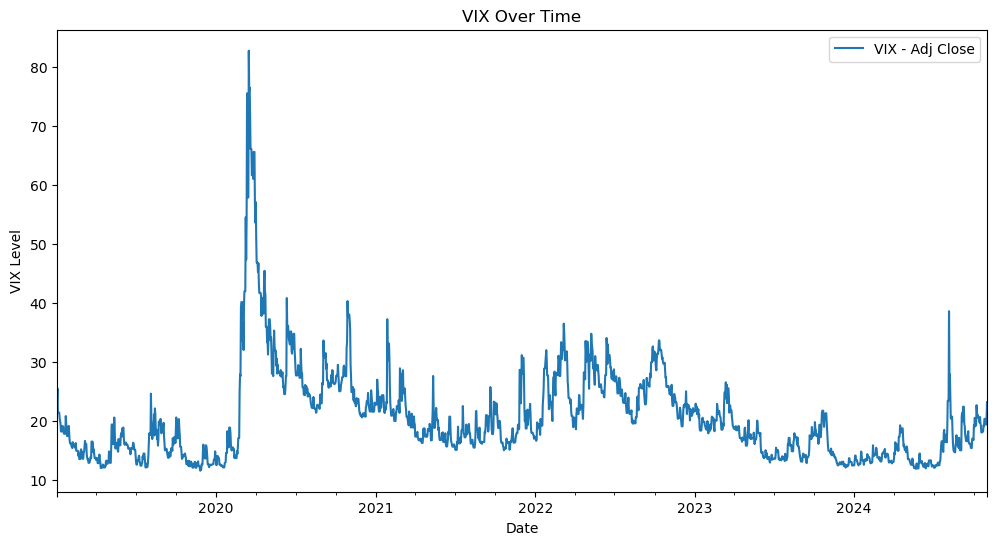

In [18]:
'''vix.plot(figsize=(12, 6))
plt.plot(vix.index, vix['Adj Close'], label='VIX - Adj Close')
plt.title('VIX Over Time')
plt.xlabel('Date')
plt.ylabel('VIX Level')
plt.legend()

plt.show()'''

vix.plot(y='Adj Close', figsize=(12, 6), label='VIX - Adj Close')
plt.title('VIX Over Time')
plt.xlabel('Date')
plt.ylabel('VIX Level')
plt.legend()
plt.show()

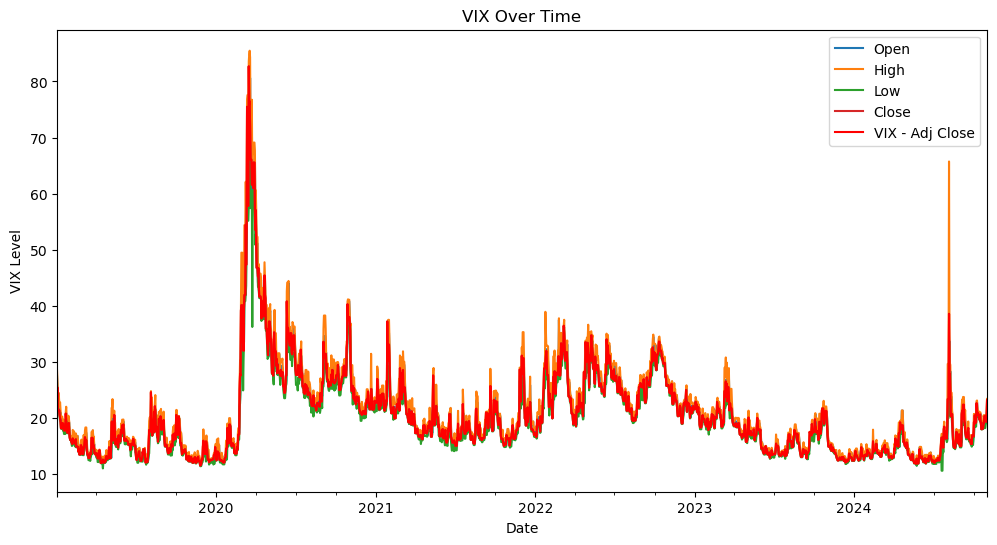

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot all numeric columns in vix (except 'Volume', if you don’t want it):
vix[['Open', 'High', 'Low', 'Close']].plot(ax=ax)

# Plot 'Adj Close' with a label
ax.plot(vix.index, vix['Adj Close'], label='VIX - Adj Close', color='red')

ax.set_title('VIX Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('VIX Level')
ax.legend()
plt.show()

In [22]:
# Example normalization function: (x - mean) / std
def normalize_column(series):
    return (series - series.mean()) / series.std()

In [24]:
# Apply normalization only to numeric columns
vix_normalized = vix.copy()
for col in ['Open','High','Low','Close','Adj Close','Volume']:
    vix_normalized[col] = normalize_column(vix_normalized[col])

In [26]:
print("\nVIX Data After Normalization (Head):")
print(vix_normalized.head())


VIX Data After Normalization (Head):
Price                          Open      High       Low     Close  Adj Close  \
Date                                                                           
2019-01-02 00:00:00+00:00  0.845343  0.753582  0.491896  0.359872   0.359872   
2019-01-03 00:00:00+00:00  0.615304  0.536574  0.630723  0.642536   0.642536   
2019-01-04 00:00:00+00:00  0.452050  0.298202  0.233677  0.126643   0.126643   
2019-01-05 00:00:00+00:00  0.452050  0.298202  0.233677  0.126643   0.126643   
2019-01-06 00:00:00+00:00  0.452050  0.298202  0.233677  0.126643   0.126643   

Price                      Volume  
Date                               
2019-01-02 00:00:00+00:00     NaN  
2019-01-03 00:00:00+00:00     NaN  
2019-01-04 00:00:00+00:00     NaN  
2019-01-05 00:00:00+00:00     NaN  
2019-01-06 00:00:00+00:00     NaN  


In [28]:
# Print basic statistics of normalized data
columns_to_describe = ['Open','High','Low','Close','Adj Close','Volume']

print("\nNormalized Data Statistics:")
for col in columns_to_describe:
    print_basic_statistics(vix_normalized, col)


Normalized Data Statistics:
Open       --- Mean: -0.0000	Std: 1.0000	Max: 7.6661	Min: -1.1347
High       --- Mean: 0.0000	Std: 1.0000	Max: 7.1559	Min: -1.1287
Low        --- Mean: 0.0000	Std: 1.0000	Max: 7.0612	Min: -1.2337
Close      --- Mean: -0.0000	Std: 1.0000	Max: 7.8980	Min: -1.1206
Adj Close  --- Mean: -0.0000	Std: 1.0000	Max: 7.8980	Min: -1.1206
Volume     --- Mean: nan	Std: nan	Max: nan	Min: nan


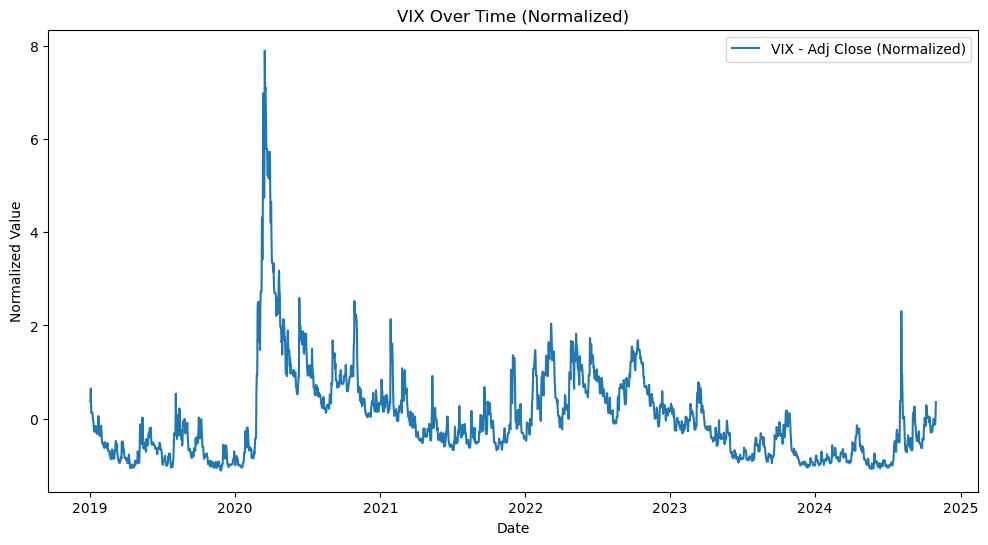

In [30]:
# Quick plot of normalized 'Adj Close'
plt.figure(figsize=(12,6))
plt.plot(vix_normalized.index, vix_normalized['Adj Close'], label='VIX - Adj Close (Normalized)')
plt.title('VIX Over Time (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

In [32]:
vix_normalized.to_csv('vix_preprocessed.csv', index=True)
print("\nPreprocessed (normalized) VIX data saved to 'vix_preprocessed.csv'.")


Preprocessed (normalized) VIX data saved to 'vix_preprocessed.csv'.


# First Linear Regression Model

In [35]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import visualize as vs      
import stock_data as sd     
import LinearRegressionModel

# Load the preprocessed data
stocks = pd.read_csv('vix_preprocessed.csv', index_col=0, parse_dates=True)
display(stocks.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, label_range = sd.train_test_split_linear_regression(stocks)

print("x_train:", X_train.shape)
print("y_train:", y_train.shape)
print("x_test:",  X_test.shape)
print("y_test:",  y_test.shape)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00+00:00,0.845343,0.753582,0.491896,0.359872,0.359872,NaN
2019-01-03 00:00:00+00:00,0.615304,0.536574,0.630723,0.642536,0.642536,NaN
2019-01-04 00:00:00+00:00,0.452050,0.298202,0.233677,0.126643,0.126643,NaN
2019-01-05 00:00:00+00:00,0.452050,0.298202,0.233677,0.126643,0.126643,NaN
2019-01-06 00:00:00+00:00,0.452050,0.298202,0.233677,0.126643,0.126643,NaN


x_train: (1460, 1)
y_train: (1460, 1)
x_test: (670, 1)
y_test: (670, 1)


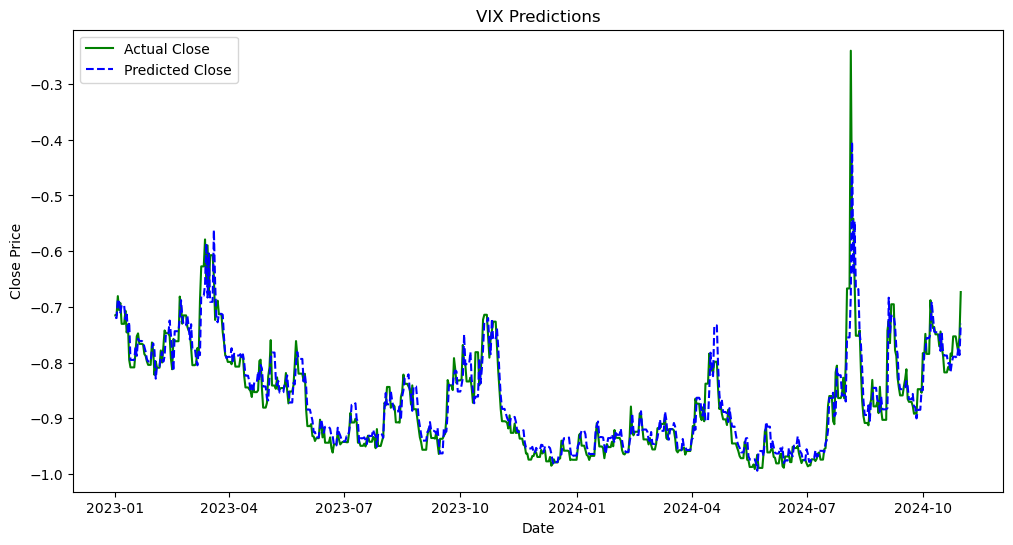

Train Score: 0.0031 MSE (0.0559 RMSE)
Test Score: 0.00110119 MSE (0.03318416 RMSE)


In [36]:
# Build the Linear Regression model
model = LinearRegressionModel.build_model(X_train, y_train)
predictions = LinearRegressionModel.predict_prices(model, X_test)

# Extract the original dates for the test set
dates_test = stocks.index[-len(y_test):]

# Plot the predictions with actual values
vs.plot_prediction(dates_test, y_test.flatten(), predictions.flatten(), title="VIX Predictions", y_label="Close Price", x_label="Date")

# Evaluate the model
trainScore = mean_squared_error(y_train, model.predict(X_train))
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


In [39]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

import visualize as vs      
import stock_data as sd     
import LinearRegressionModel

In [41]:
stocks = pd.read_csv('vix_preprocessed.csv')
display(stocks.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02 00:00:00+00:00,0.845343,0.753582,0.491896,0.359872,0.359872,NaN
1,2019-01-03 00:00:00+00:00,0.615304,0.536574,0.630723,0.642536,0.642536,NaN
2,2019-01-04 00:00:00+00:00,0.452050,0.298202,0.233677,0.126643,0.126643,NaN
3,2019-01-05 00:00:00+00:00,0.452050,0.298202,0.233677,0.126643,0.126643,NaN
4,2019-01-06 00:00:00+00:00,0.452050,0.298202,0.233677,0.126643,0.126643,NaN


In [43]:
stocks = pd.read_csv('vix_preprocessed.csv')
display(stocks.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02 00:00:00+00:00,0.845343,0.753582,0.491896,0.359872,0.359872,NaN
1,2019-01-03 00:00:00+00:00,0.615304,0.536574,0.630723,0.642536,0.642536,NaN
2,2019-01-04 00:00:00+00:00,0.452050,0.298202,0.233677,0.126643,0.126643,NaN
3,2019-01-05 00:00:00+00:00,0.452050,0.298202,0.233677,0.126643,0.126643,NaN
4,2019-01-06 00:00:00+00:00,0.452050,0.298202,0.233677,0.126643,0.126643,NaN


In [45]:
X_train, X_test, y_train, y_test, label_range = sd.train_test_split_linear_regression(stocks)

print("x_train:", X_train.shape)
print("y_train:", y_train.shape)
print("x_test:",  X_test.shape)
print("y_test:",  y_test.shape)

x_train: (1460, 1)
y_train: (1460, 1)
x_test: (670, 1)
y_test: (670, 1)


In [47]:
X_train, X_test, y_train, y_test, label_range = sd.train_test_split_linear_regression(stocks)

print("x_train:", X_train.shape)
print("y_train:", y_train.shape)
print("x_test:",  X_test.shape)
print("y_test:",  y_test.shape)

x_train: (1460, 1)
y_train: (1460, 1)
x_test: (670, 1)
y_test: (670, 1)


In [49]:
model = LinearRegressionModel.build_model(X_train, y_train)
predictions = LinearRegressionModel.predict_prices(model, X_test)
#predictions = LinearRegressionModel.predict_prices(model, X_test, label_range)

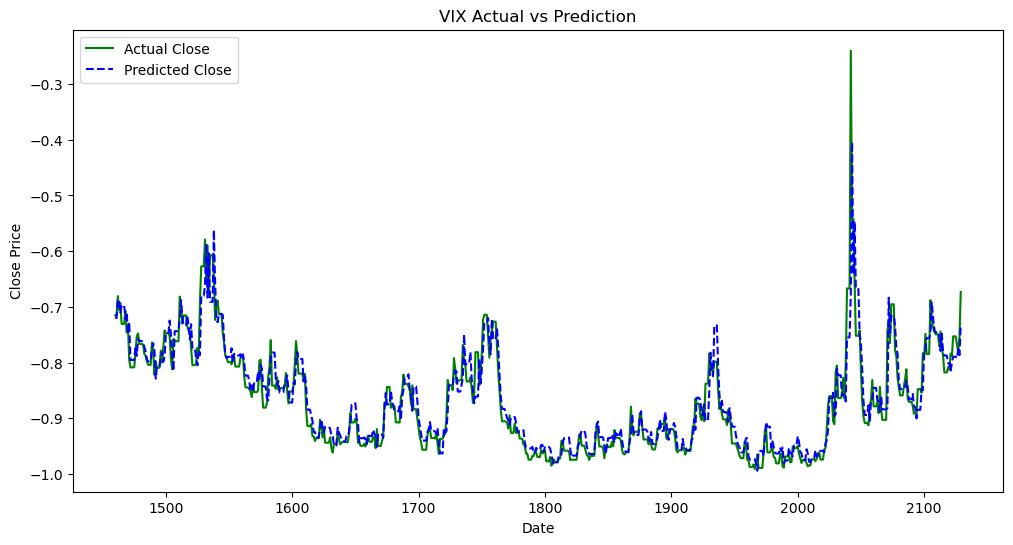

In [51]:
# Extract dates for the test set
dates_test = stocks.index[-len(y_test):]
# Plot the predictions with actual values
vs.plot_prediction(dates_test, y_test.flatten(), predictions.flatten())

In [53]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 0.0034 MSE (0.0584 RMSE)
Test Score: 0.00110119 MSE (0.03318416 RMSE)


# Linear Regression Scatterplot

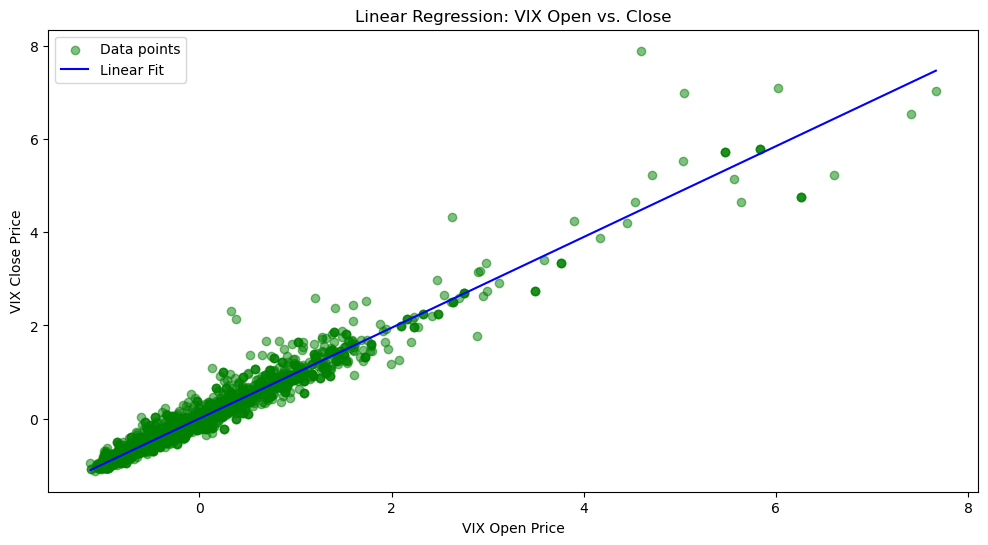

In [56]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Load the VIX data
stocks = pd.read_csv('vix_preprocessed.csv', index_col=0, parse_dates=True)

# Extract single-feature X and y
X = stocks[['Open']].values  # Feature: Open
y = stocks['Close'].values   # Target: Close

# Fit a simple linear regression
model = LinearRegression()
model.fit(X, y)

# Generate predictions across the range of X
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.5, label='Data points', color='green')
plt.plot(X_range, y_pred, color='blue', label='Linear Fit')
plt.xlabel('VIX Open Price')
plt.ylabel('VIX Close Price')
plt.title('Linear Regression: VIX Open vs. Close')
plt.legend()
plt.show()


# Second Linear Regression Model

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the preprocessed VIX data
stocks = pd.read_csv('vix_preprocessed.csv', index_col=0, parse_dates=True)

In [61]:
# Use 'Open' as the feature and 'Close' as the target
X = stocks[['Open']].values  # Feature
y = stocks['Close'].values   # Target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [63]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [67]:
# Calculate Mean Squared Error for train and test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 0.0567
Test MSE: 0.0257


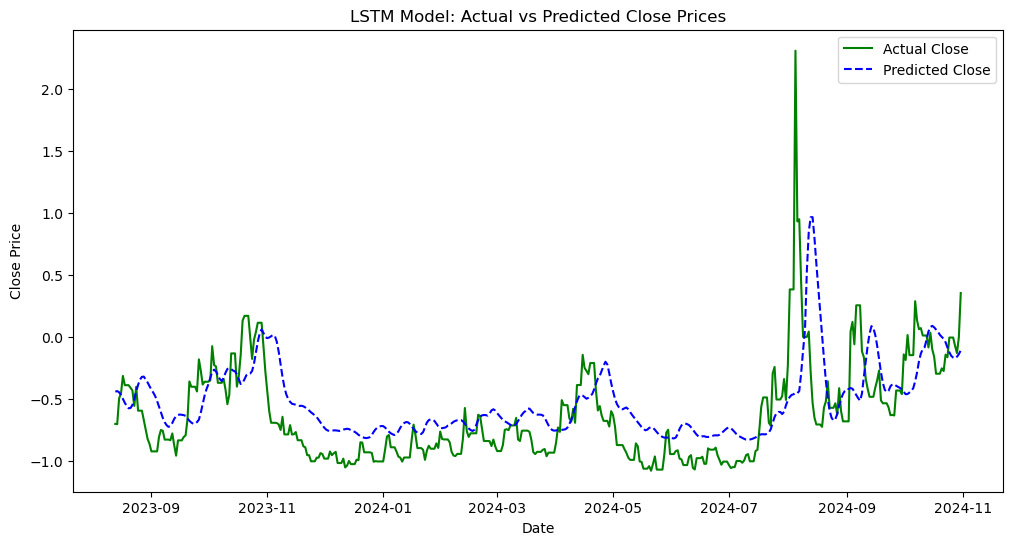

In [100]:
# Plot predictions vs actual values with dates on x-axis
plt.figure(figsize=(12, 6))

# Plot actual values (green line)
plt.plot(vix.index[-len(y_test):], y_test, label='Actual Close', color='green')

# Plot predicted values (blue dashed line)
plt.plot(vix.index[-len(y_test):], predictions, label='Predicted Close', color='blue', linestyle='--')

# Add labels and legend
plt.title('LSTM Model: Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Long-Sort Term Memory Model

In [72]:
import math
import pandas as pd
import numpy as np
import time
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

import lstm
import visualize as vs
import stock_data as sd  # Custom modules 

In [74]:
# Load the VIX dataset
vix_data = pd.read_csv('vix_preprocessed.csv', index_col=0, parse_dates=True)
vix = vix_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]  # Select relevant columns

# Display the first few rows
print("VIX Data (Head):")
print(vix.head())

VIX Data (Head):
                               Open      High       Low     Close  Adj Close
Date                                                                        
2019-01-02 00:00:00+00:00  0.845343  0.753582  0.491896  0.359872   0.359872
2019-01-03 00:00:00+00:00  0.615304  0.536574  0.630723  0.642536   0.642536
2019-01-04 00:00:00+00:00  0.452050  0.298202  0.233677  0.126643   0.126643
2019-01-05 00:00:00+00:00  0.452050  0.298202  0.233677  0.126643   0.126643
2019-01-06 00:00:00+00:00  0.452050  0.298202  0.233677  0.126643   0.126643


In [76]:
# Split the data for LSTM
X_train, X_test, y_train, y_test = sd.train_test_split_lstm(vix, prediction_time=5)

# Unroll the data (LSTM requires sequential input)
unroll_length = 50
X_train = sd.unroll(X_train, sequence_length=unroll_length)
X_test = sd.unroll(X_test, sequence_length=unroll_length)

# Align y_train and y_test to match unrolled data
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

In [78]:
# Print the shapes of training and testing sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1574, 50, 5)
y_train: (1574,)
X_test: (446, 50, 5)
y_test: (446,)


In [80]:
# Build the LSTM model
input_dim = X_train.shape[-1]  # Number of features
output_dim = unroll_length  # Number of LSTM units

In [82]:
# Choose model: improved or basic
model = lstm.build_improved_model(input_dim=input_dim, output_dim=output_dim)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('Compilation time:', time.time() - start)

Compilation time: 0.010626077651977539


In [86]:
# Train the model
model.fit(
    X_train,
    y_train,
    epochs=10,  # Increase for better training
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.6481 - val_loss: 0.0875
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3178 - val_loss: 0.0975
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3082 - val_loss: 0.0945
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3077 - val_loss: 0.0940
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2373 - val_loss: 0.0989
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2290 - val_loss: 0.0967
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2367 - val_loss: 0.0902
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2563 - val_loss: 0.0978
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2172 - val_loss: 0.0954
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2437 - val_loss: 0.0815


In [88]:
# Save the model
model.save('vix_lstm_model.h5')
print("Model saved to 'vix_lstm_model.h5'.")

Model saved to 'vix_lstm_model.h5'.


In [108]:
# Make predictions
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


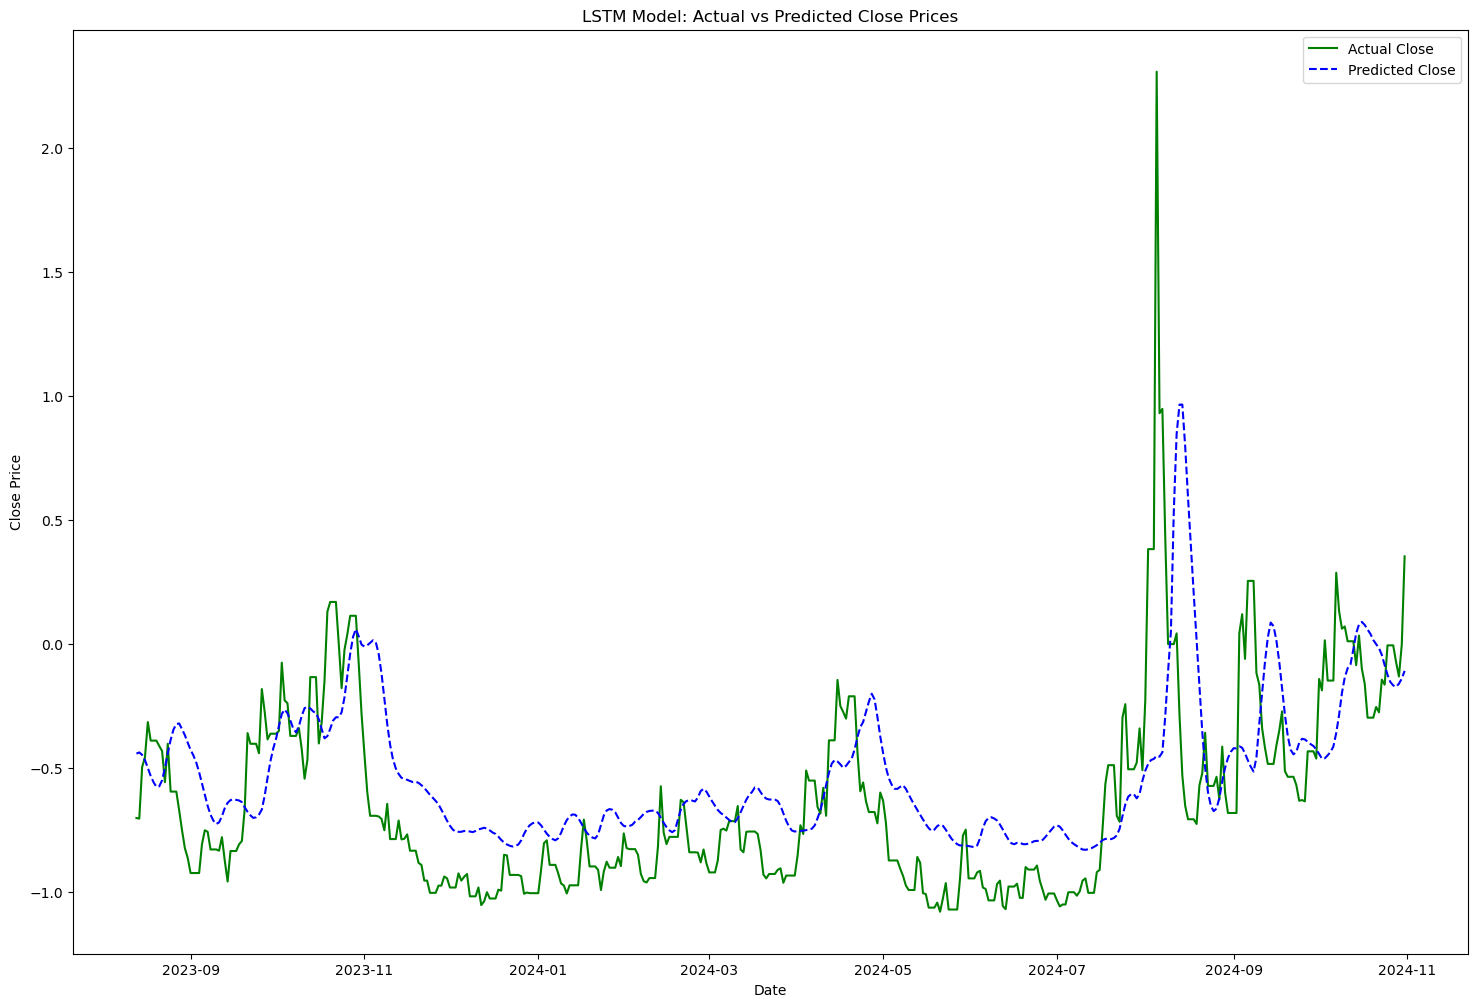

In [112]:
# Plot predictions vs actual values with dates on x-axis
plt.figure(figsize=(18, 12))
plt.plot(vix.index[-len(y_test):], y_test, label='Actual Close', color='green')
plt.plot(vix.index[-len(y_test):], predictions, label='Predicted Close', color='blue', linestyle='--')
plt.title('LSTM Model: Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [114]:
# Evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (train_mse, math.sqrt(train_mse)))
print('Test Score: %.8f MSE (%.8f RMSE)' % (test_mse, math.sqrt(test_mse)))

Train Score: 0.19575179 MSE (0.44243845 RMSE)
Test Score: 0.12202460 MSE (0.34932020 RMSE)


# Improve the LSMT Model

In [205]:
# Hyperparameters
batch_size = 32
epochs = 50  # Early stopping will terminate earlier if needed
unroll_length = 50
dropout_rate = 0.5

In [207]:
# Build the improved LSTM model
input_dim = X_train.shape[-1]
model = lstm.build_improved_model(
    input_dim=input_dim,
    output_dim=unroll_length,
    return_sequences=True
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [209]:
# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('Compilation time:', time.time() - start)

# Early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Compilation time: 0.005463838577270508


In [211]:
# Train the model
model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2,
    validation_split=0.1
)

Epoch 1/50
45/45 - 2s - 36ms/step - loss: 0.4630 - val_loss: 0.1084
Epoch 2/50
45/45 - 1s - 19ms/step - loss: 0.3244 - val_loss: 0.0926
Epoch 3/50
45/45 - 1s - 20ms/step - loss: 0.2842 - val_loss: 0.0938
Epoch 4/50
45/45 - 1s - 20ms/step - loss: 0.2977 - val_loss: 0.0966
Epoch 5/50
45/45 - 1s - 20ms/step - loss: 0.2406 - val_loss: 0.0876
Epoch 6/50
45/45 - 1s - 20ms/step - loss: 0.2488 - val_loss: 0.0790
Epoch 7/50
45/45 - 1s - 21ms/step - loss: 0.2294 - val_loss: 0.0724
Epoch 8/50
45/45 - 1s - 20ms/step - loss: 0.2103 - val_loss: 0.0882
Epoch 9/50
45/45 - 1s - 20ms/step - loss: 0.2087 - val_loss: 0.0804
Epoch 10/50
45/45 - 1s - 20ms/step - loss: 0.2311 - val_loss: 0.0818
Epoch 11/50
45/45 - 1s - 20ms/step - loss: 0.2060 - val_loss: 0.0983
Epoch 12/50
45/45 - 1s - 20ms/step - loss: 0.1989 - val_loss: 0.0846
Epoch 13/50
45/45 - 1s - 20ms/step - loss: 0.2019 - val_loss: 0.0891
Epoch 14/50
45/45 - 1s - 20ms/step - loss: 0.2110 - val_loss: 0.0715
Epoch 15/50
45/45 - 1s - 20ms/step - loss: 

In [213]:
# Generate predictions
predictions = model.predict(X_test, batch_size=batch_size)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


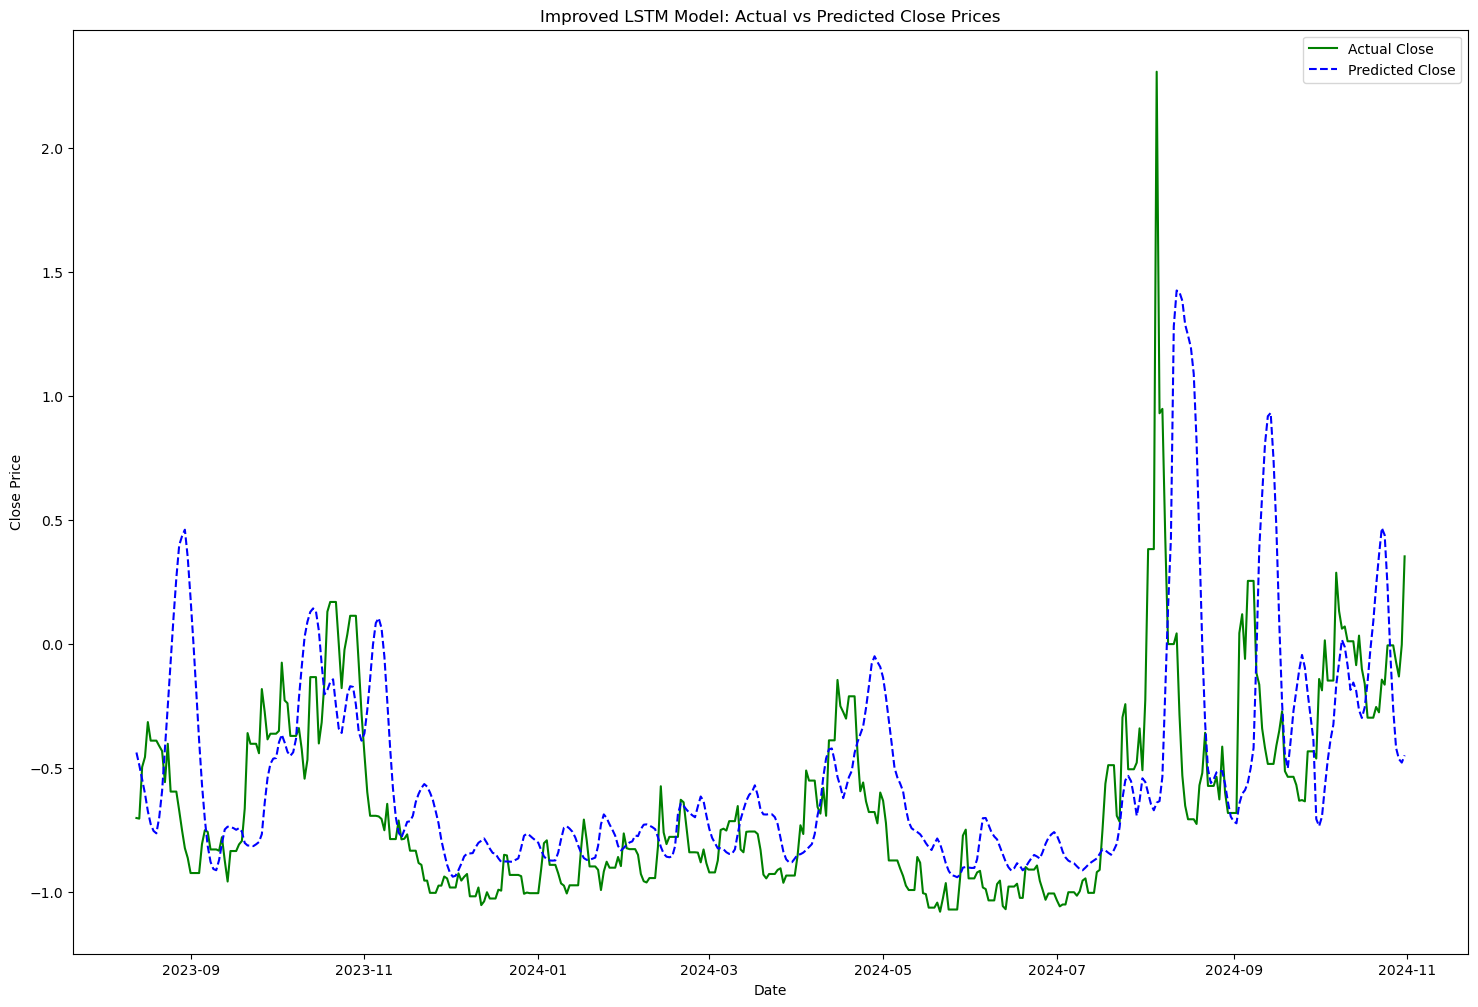

In [215]:
# Plot predictions vs actual values with dates on x-axis
plt.figure(figsize=(18, 12))
plt.plot(vix.index[-len(y_test):], y_test, label='Actual Close', color='green')
plt.plot(vix.index[-len(y_test):], predictions, label='Predicted Close', color='blue', linestyle='--')
plt.title('Improved LSTM Model: Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [163]:
# Evaluate the model
trainScore = model.evaluate(X_train, y_train, verbose=0)
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.17811352 MSE (0.42203498 RMSE)
Test Score: 0.11513913 MSE (0.33932157 RMSE)


In [165]:
# Save the model
model.save('vix_lstm_improved_model.h5')
print("Model saved to 'vix_lstm_improved_model.h5'.")

Model saved to 'vix_lstm_improved_model.h5'.
